# Starting

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May 24 20:28:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import sklearn

# import some classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

# import modules for vectorizing and pipe
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline

# scale data
from sklearn.preprocessing import StandardScaler

# upsampling downsampling
from sklearn.utils import resample

# modules for model selection
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# modules for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

# modules for vizualisation
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# others
import itertools
import random

from sklearn.exceptions import ConvergenceWarning

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
my_local_drive='/content/gdrive/MyDrive/FakeNews'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/MyDrive/FakeNews


'/content/gdrive/MyDrive/FakeNews'

# Loading a dataset and choose classification


In [ ]:
df = pd.read_csv("claimskg.csv",sep=";")
del df['Unnamed: 0']
df.head(2)

In [ ]:
df = pd.read_csv("claimskg.csv",sep=";")
del df['Unnamed: 0']

def f(x):
  if x==1:
    return 0
  if x==2:
    return 2
  return 1

def g(x):
  if x==1 or x==0:
    return 0
  else: 
    return 1

def gbis(x):
  if x=="True" or x=="False":
    return "True_False"
  else: 
    return "MIXTURE"

def choose_classification():
  print("Select which classification you want:")
  print("0 : {True} vs {False}")
  print("1 : {True,False} vs {Mixture}")
  print("2 : {True} vs {False} vs {Mixture}")
  n = int(input("select a number: "))
  return n

def resample_(n,df):
  
  if n == 0:
    # {True} vs {False}
    df = df[df.truthRating.isin([0,1])]
    df.groupby("ratingName").size().plot(kind='pie',y='ratingName',label = "Classe",autopct='%1.1f%%',title= "Downsampling or Upsampling  is needed?")
    plt.show()
    true_data = df[df.ratingName == "True"]
    false_data = df[df.ratingName == "False"]
    
    # downsampling false data
    false_data = false_data.sample(len(true_data))
    df = pd.concat([true_data,false_data])
    df.groupby("ratingName").size().plot(kind='pie',y='ratingName',label = "Classe",autopct='%1.1f%%',title= "After resampling")
    plt.show()
  
  if n == 1:
    # {True,False} vs {Mixture}
    df["truthRating"] = df["truthRating"].apply(g)
    df["ratingName"] = df["ratingName"].apply(gbis)
    df.groupby("ratingName").size().plot(kind='pie',y='ratingName',label = "Classe",autopct='%1.1f%%',title= "Downsampling or Upsampling  is needed?")
    plt.show()
    true_false_data = df[df.ratingName == "True_False"]
    mixture_data = df[df.ratingName == "MIXTURE"]
    
    # downsampling mixture data
    true_false_data = true_false_data.sample(len(mixture_data))
    df = pd.concat([true_false_data,mixture_data])
    df.groupby("ratingName").size().plot(kind='pie',y='ratingName',label = "Classe",autopct='%1.1f%%',title= "After resampling")
    plt.show()

  if n == 2:
    # {True} vs {False} vs {Mixture}
    df.groupby("ratingName").size().plot(kind='pie',y='ratingName',label = "Classe",autopct='%1.1f%%',title= "Downsampling or Upsampling  is needed?")
    plt.show()
    true_data = df[df.ratingName == "True"]
    false_data = df[df.ratingName == "False"]
    mixture_data = df[df.ratingName == "MIXTURE"]

    # downsampling false data
    false_data = false_data.sample(len(true_data))
    mixture_data = mixture_data.sample(len(true_data))
    df = pd.concat([true_data,false_data,mixture_data])
    df.groupby("ratingName").size().plot(kind='pie',y='ratingName',label = "Classe",autopct='%1.1f%%',title= "After resampling")
    plt.show()
  return df

Select which classification you want:
0 : {True} vs {False}
1 : {True,False} vs {Mixture}
2 : {True} vs {False} vs {Mixture}
select a number: 0


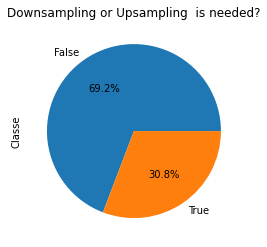

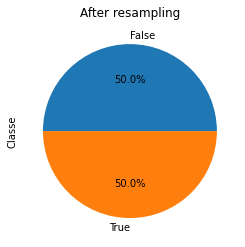

classes : ['True' 'False'] n° rows df : 8904


In [ ]:
df["truthRating"] = df["truthRating"].apply(f)

n = choose_classification()

df = resample_(n,df)

classes = df.ratingName.unique()

label_dict = {}
for index, possible_label in enumerate(classes):
    label_dict[possible_label] = index

df['label'] = df.ratingName.replace(label_dict)
# récupération de certaines features
df["text"] = df["text"] + " " +  df["author"] + " " + df["headline"] +  " " + df["source"]
df = df[["text","label","ratingName"]]

train, test = train_test_split(df, test_size=0.1, shuffle=True,random_state=0)
print("classes :",classes,"n° rows df :", len(df))

In [ ]:
# Saving Data in 2 csv file
train.to_csv("train.csv",sep=';')
test.to_csv("test.csv",sep=';')

# Ingenierie Textuelle

### Installation Packages & Loading Data

In [ ]:
!pip install langdetect 
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 32.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c789c9188609a6760e89a0c75a8bb5393bd99ce80c8ce47d96856cbc52d23dfe
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 45.4 MB/s 
     |████████████████████████████████| 287 kB 70.1 MB/s 


In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys

import contractions

# librairie BeautifulSoup
from bs4 import BeautifulSoup

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

## detection de language
import langdetect 

import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import RegexpParser

# il est possible de charger l'ensemble des librairies en une seule fois 
# décocher le commentaire de la ligne ci-dessous
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
nltk.download('tagsets')
nltk.download("stopwords")
nltk.download('wordnet')

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

import spacy
from spacy.tokens import Span
# il faut sélectionner pour quelle langue les traitements vont être faits.
nlp = spacy.load('en')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Loading training set and testing set
df_train = pd.read_csv("train.csv",sep=";")
df_test = pd.read_csv("test.csv",sep=";")

del df_train['Unnamed: 0'];del df_test['Unnamed: 0']

### Text Preprocessing class and function





In [ ]:
# text = np.concatenate((df_train["text"],df_test["text"]))

# def contains_digit(word):
#   for c in word:
#     if c.isdigit():
#       return True
#   return False

# stopwords = np.array(nltk.corpus.stopwords.words('english'))

# for i,sentence in zip(range(len(text)),text):
#   # Removing punctuation
#   tokenizer = nltk.RegexpTokenizer(r"\w+")
#   sentence = tokenizer.tokenize(sentence)

#   sentence = " ".join(sentence)
#   sentence = re.sub(r'Unknown', '', str(sentence))

#   sentence = word_tokenize(sentence)

#   # converting each word to lowercase
#   sentence = [word.lower() for word in sentence if not word in stopwords]

#   # Removing stopwords
#   sentence = [word for word in sentence if not word in stopwords]

#   # Removing word with only one letter
#   sentence = [word for word in sentence if len(word) != 1]

#   # Removing word with digits
#   sentence = [word for word in sentence if not contains_digit(word)]

#   # stemmer words 
#   # lemmatizer = WordNetLemmatizer()
#   ps = PorterStemmer()
#   sentence = [ps.stem(word) for word in sentence]

#   ## Removing pronouns infinitive verbs dt...
#   # for word in nltk.pos_tag(sentence):
#   #   word_to_keep = []
#   #   if word[1] not in ['IN', 'PP', 'DT','PRP$','VB','MD']:
#   #     word_to_keep.append(word[0])
  
#   sentence = (" ").join(sentence)
#   text[i] = sentence

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def MyCleanText(X, 
  lowercase=False, # mettre en minuscule
  removestopwords=False, # supprimer les stopwords
  removedigit=False, # supprimer les nombres 
  getstemmer=False, # conserver la racine des termes
  getlemmatisation=False # lematisation des termes 
  ):

  sentence=str(X)

  # suppression des caractères spéciaux
  sentence = re.sub(r'[^\w\s]',' ', sentence)
  # suppression de tous les caractères uniques
  sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
  # substitution des espaces multiples par un seul espace
  sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)
  # subtitution of Unknown
  sentence = re.sub(r'Unknown', '', sentence)

  # remove some space
  sentence = sentence.strip()

  # decoupage en mots
  tokens = word_tokenize(sentence)
  if lowercase:
    tokens = [token.lower() for token in tokens]

  # suppression ponctuation
  table = str.maketrans('', '', string.punctuation)
  words = [token.translate(table) for token in tokens]

  # suppression des tokens non alphabetique ou numerique
  words = [word for word in words if word.isalnum()]

  # suppression des tokens numerique
  if removedigit:
    words = [word for word in words if not word.isdigit()]

  # suppression des stopwords
  if removestopwords:
    stopwords = np.array(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if not word in stopwords]

  # lemmatisation
  if getlemmatisation:
    lemmatizer=WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word)for word in words]


  # racinisation
  if getstemmer:
    ps = PorterStemmer()
    words=[ps.stem(word) for word in words]

    sentence= ' '.join(words)

  return sentence 

class TextNormalizer(BaseEstimator, TransformerMixin):
  def __init__(self, 
    removestopwords=False, # suppression des stopwords
    lowercase=False,# passage en minuscule
    removedigit=False, # supprimer les nombres 
    getstemmer=False,# racinisation des termes 
    getlemmatisation=False # lemmatisation des termes 
    ):
  
    self.lowercase=lowercase
    self.getstemmer=getstemmer
    self.removestopwords=removestopwords
    self.getlemmatisation=getlemmatisation
    self.removedigit=removedigit
    

  def transform(self, X, **transform_params):
    # Nettoyage du texte
    X=X.copy() # pour conserver le fichier d'origine
    return [MyCleanText(text,lowercase=self.lowercase,
    getstemmer=self.getstemmer,
    removestopwords=self.removestopwords,
    getlemmatisation=self.getlemmatisation,
    removedigit=self.removedigit) for text in X]

  def fit(self, X, y=None, **fit_params):
    return self
  
  def fit_transform(self, X, y=None, **fit_params):
    return self.fit(X).transform(X)

  def get_params(self, deep=True):
    return {
    'lowercase':self.lowercase,
    'getstemmer':self.getstemmer,
    'removestopwords':self.removestopwords,
    'getlemmatisation':self.getlemmatisation,
    'removedigit':self.removedigit
    } 
  
  def set_params (self, **parameters):
    for parameter, value in parameters.items():
      setattr(self,parameter,value)
    return self 



In [ ]:
def preprocess_selection(model_name,model,X,y,lowercase=False):
    CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                        ('count_vectorizer', CountVectorizer(lowercase=False)),
                        (model_name, model)])
    CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                                getstemmer=False,removedigit=False)), 
                        ('count_vectorizer', CountVectorizer(lowercase=lowercase)),
                        (model_name, model)])
    CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=False,removedigit=False)), 
                        ('count_vectorizer', CountVectorizer(lowercase=lowercase)),
                        (model_name, model)])

    CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=True,removedigit=False)), 
                        ('count_vectorizer', CountVectorizer(lowercase=lowercase)),
                        (model_name, model)])
    
    CV_lowStopna = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=True,removedigit=True)), 
                        ('count_vectorizer', CountVectorizer(lowercase=lowercase)),
                        (model_name, model)])

    TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                        ('tfidf_vectorizer', TfidfVectorizer(lowercase=lowercase)),
                        (model_name, model)])

    TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                                getstemmer=False,removedigit=False)), 
                        ('tfidf_vectorizer', TfidfVectorizer(lowercase=lowercase)),
                        (model_name, model)])
    TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=False,removedigit=False)), 
                        ('tfidf_vectorizer', TfidfVectorizer(lowercase=lowercase)),
                        (model_name, model)])

    TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=True,removedigit=False)), 
                        ('tfidf_vectorizer', TfidfVectorizer(lowercase=lowercase)),
                        (model_name, model)])
    TFIDF_lowStopna = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=True,removedigit=True)), 
                        ('tfidf_vectorizer', TfidfVectorizer(lowercase=lowercase)),
                        (model_name, model)])

    all_models = [
        ("CV_brut", CV_brut),
        ("CV_lowcase", CV_lowcase),
        ("CV_lowStop", CV_lowStop),
        ("CV_lowStopstem",CV_lowStopstem),
        ("CV_lowStopna",CV_lowStopna),
        ("TFIDF_lowStopna", TFIDF_lowStopna),
        ("TFIDF_lowcase", TFIDF_lowcase),
        ("TFIDF_lowStop", TFIDF_lowStop),
        ("TFIDF_lowStopstem",TFIDF_lowStopstem),
        ("TFIDF_brut", TFIDF_brut),
    ]

    print ("Evaluation des différentes configurations : ")
    unsorted_scores = [(name, cross_val_score(model, X, y, cv=5).mean()) for name, model in all_models]
    scores = sorted(unsorted_scores, key=lambda x: -x[1])


    print(tabulate(scores, floatfmt='.4f', headers=('Pipeline', 'Score')))

### Selecting best preprocessing
OPTIONAL!
WARNING !!!
<br>
May take some minutes
<br>
example below ->

In [ ]:
X = df_train["text"]
y = df_train["label"] 

X_s = X.sample(500)
y_s = y.loc[X_s.index]
preprocess_selection("multinomial_nb",MultinomialNB(),X_s,y_s)

Evaluation des différentes configurations : 
Pipeline             Score
-----------------  -------
CV_brut             0.4660
CV_lowcase          0.4660
CV_lowStop          0.4660
TFIDF_lowcase       0.4540
TFIDF_lowStop       0.4540
TFIDF_brut          0.4540
CV_lowStopna        0.4520
CV_lowStopstem      0.4480
TFIDF_lowStopstem   0.4320
TFIDF_lowStopna     0.4180


# ACP Visualisation des données

In [ ]:
X = df_train["text"]
y = df_train["label"]
text_normalizer= TextNormalizer(removestopwords=False,lowercase=True,getstemmer=False,removedigit=False) 
X=text_normalizer.fit_transform(X)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

variance ratio:  [0.00262037 0.00476872]
variance ratio sum:  0.007389088240429676
singular values: [14.51810229  7.51923588]


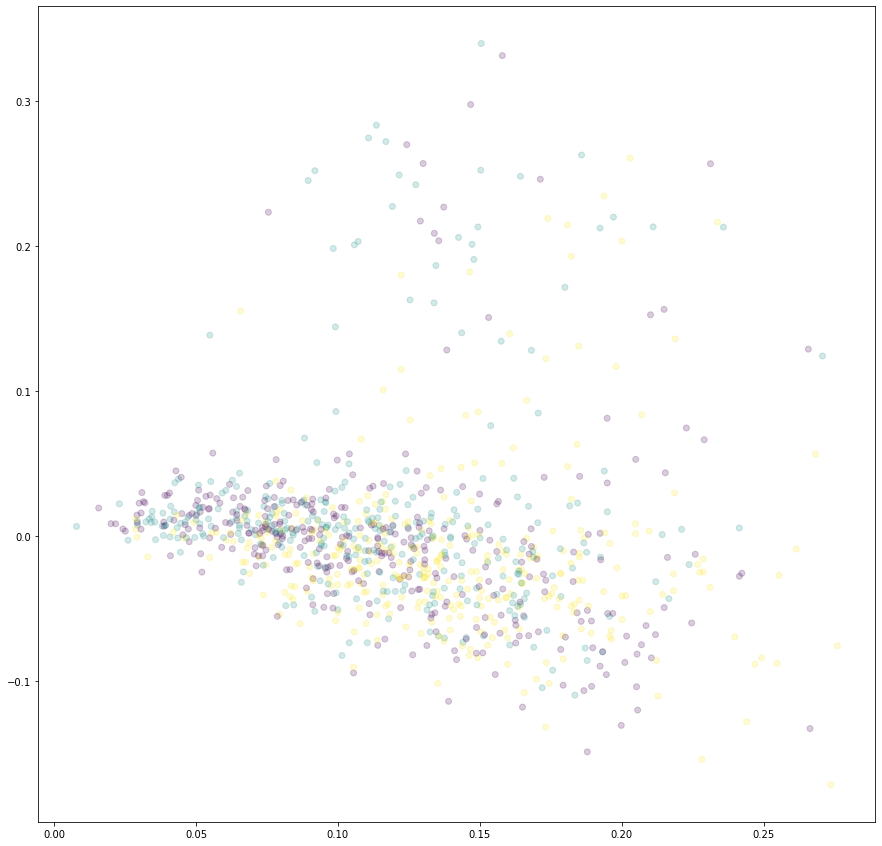

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

print("variance ratio: ",svd.explained_variance_ratio_)

print("variance ratio sum: ",svd.explained_variance_ratio_.sum())
print("singular values:" ,svd.singular_values_)
fig,ax = plt.subplots(figsize=(15,15))
ax.scatter(X_svd[:1000,0], X_svd[:1000,1], alpha=0.2,c=y[:1000])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  """


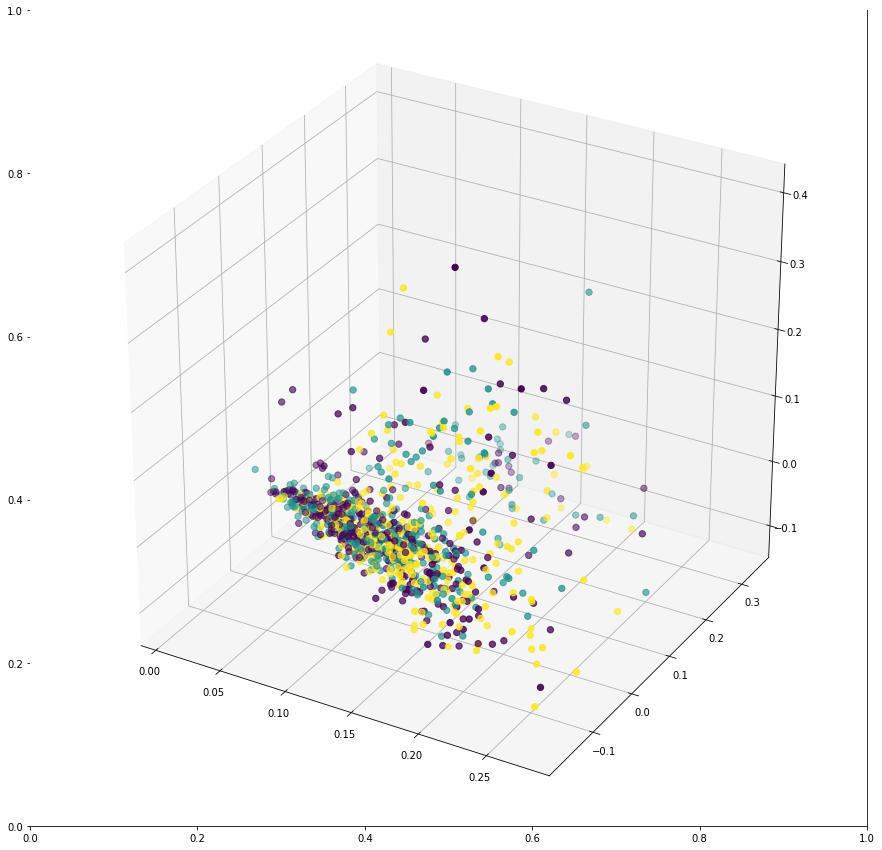

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
svd = TruncatedSVD(n_components=3)
X_svd = svd.fit_transform(X)
fig,ax = plt.subplots(figsize = (15,15))
ax = fig.gca(projection='3d')
ax.scatter(X_svd[:1000,0],X_svd[:1000,1],
     X_svd[:1000,2],
     zdir='z',s=40,depthshade=True,c=y[:1000])
plt.show()

# Premières approches 

In [ ]:
def plot_confusion_matrix(cm, classes=classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = 2*cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def plot_quad_error(X,y,model):
  arr1=[];arr2=[]
  size = np.linspace(500,int(len(X)),25).astype('int32')
  for m in size:
    X_s = X.sample(m)
    y_s = y.loc[X_s.index]
    X_train,X_val,y_train,y_val = train_test_split(X_s,y_s,train_size=0.8,random_state=0)
    clf = model.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    squarred_error_train = (1/len(y_pred_train))*np.sum((y_pred_train - y_train)**2)
    squared_error_CV = (1/len(y_pred_val))*np.sum((y_pred_val - y_val)**2)
    arr1.append(squarred_error_train)
    arr2.append(squared_error_CV)

  plt.plot(size,arr1,label='train error')
  plt.plot(size,arr2,label='cv error')
  plt.xlabel("Training Size")
  plt.gca().set_xlim([100,len(X)])
  plt.ylabel("Quadratic Error")
  plt.title("Model Evaluation")
  plt.legend()
  plt.show()

## Logistic Regression special application (only for True vs False)

### special preprocessing based on frequency transformation

Before running the classifier we need to compute the fake frequency and non fake frequency of each word. By this I mean counting each word appareance in the fake corpus (set of all fake post) and in the non fake corpus (set of all non fake post. From approximatively 3000 features one corresponding to each word we are now only dealing with 2.

In [ ]:
# Last step of preprocessing = vectorizing the text
text = np.concatenate((df_train["text"],df_test["text"]))
label = np.concatenate((df_train["label"],df_test["label"]))

arr = [i for i in range(len(df_train)+len(df_test))]
idx = np.random.choice(arr,300)
text = np.concatenate((df_train["text"],df_test["text"]))
text = text[idx]
label = label[idx]

text_normalizer=TextNormalizer(lowercase=True)  
text=text_normalizer.fit_transform(text)
text = np.array(text)

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text)
corpus = np.array(vectorizer.get_feature_names())

In [ ]:
def get_fake_no_fake_text(text):
  fake_text = np.array(text[label == 0])
  non_fake_text = np.array(text[label == 1])
  return fake_text,non_fake_text

def compute_frequency(fake_text,non_fake_text):
  # Computes 2 different frequency use of dictionary for O(1) time acces to value of a paticular word
  fake_text = " ".join(fake_text)
  fake_text = word_tokenize(fake_text)
  non_fake_text = " ".join(non_fake_text)
  non_fake_text = word_tokenize(non_fake_text)
  corpus = np.unique(np.concatenate((fake_text,non_fake_text),axis=0))

  FakeFreq = {w:0 for w in corpus}
  NonFakeFreq = {w:0 for w in corpus}

  for word in fake_text:
    FakeFreq[word] += 1

  for word in non_fake_text:
    NonFakeFreq[word] += 1

  return FakeFreq,NonFakeFreq

Before running the logistic regression algorithm we need to compute the frequency of each word in the 2 corpus
<br>

The training example will the have the following format with 1 for the bias term. 
$$ y = \begin{pmatrix}
1 \\
X_{1} \\
X_{2} \\
\end{pmatrix} $$


In [ ]:
fake_text,non_fake_text= get_fake_no_fake_text(text)
FakeFreq,NonFakeFreq = compute_frequency(fake_text,non_fake_text)

In [ ]:
def feat_extraction_fake(row):
  row_text = word_tokenize(row)
  sum_fake_freq = 0
  for word in row_text:
    sum_fake_freq += FakeFreq[word]
  return sum_fake_freq

def feat_extraction_no_fake(row):
  row_text = word_tokenize(row)
  sum_non_fake_freq = 0
  for word in row_text:
    sum_non_fake_freq += NonFakeFreq[word]
  return sum_non_fake_freq

In [ ]:
dfbis_train = pd.DataFrame(text,columns=["text"])
dfbis_train["bias"] = 1
dfbis_train["fake"] = dfbis_train["text"].apply(feat_extraction_fake)
dfbis_train["no fake"] = dfbis_train["text"].apply(feat_extraction_no_fake)

X = dfbis_train[["fake","no fake"]]
y = pd.DataFrame(label,columns=["truthRating"])

Logistic Regression implementation:
<br>
In short we are the trying to minimize the following cost function with the help to the famous gradient descent algorithm.
<br>
$$ J(θ) = -\dfrac{1}{m}*\sum_{i=1}^{m}[ \log h(x^{(i)},θ) + (1 - y^{(i)})*log(1 - h(x^{(i)},θ))] $$
<br>
with h the sigmoid function define as follow $$ h(x^{i},θ) = \dfrac{1}{1 + e^{-θ^{T}*x^{(i)}}} $$

<br>

$m =$ number of training examples
<br>

$x(i) =$ i-th example of the training set 
<br>

Thus we make sure to resolve a convex problem and by this gradient descent find a global minima.

Training

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8,random_state=0)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_val)

target_names = ["No Fake","Fake"]

print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred, target_names=target_names))

Confusion matrix, without normalization


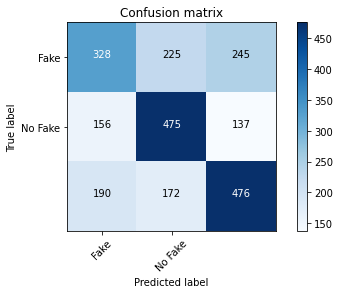

In [ ]:
plot_confusion_matrix(confusion_matrix(y_val, y_pred), classes=["Fake","No Fake"])

Etant donnée la simplicité de nos features seulement 2 il n'est pas nécesaire ici d'appliquer des algorithmes de classifications plus performant sachant qu'ici une simple regression répond très bien à notre problème.

## Naives Bayes

<br>

Naives Bayes Approach Inference Rules for binary classification.
<br>

$$\prod_{i=1}^{n} \dfrac{P \left( wi \middle| \ Fake \right)}{P \left( wi \middle| \ NonFake \right)}$$
<br>
This expression says that we're going to take the product across all of the words (n words) in a post of the probability for each word in the fake class divide it by the probability in the non fake class
<br>

Laplacian Smoothing technique to avoid zero probability issue with the formula above
<br>

$$P \left( wi \middle| \ class \right) = \dfrac{freq(wi,class)+1}{Nc + Vc} \\ class \in \{ Fake , Non Fake \} $$
<br>

$N_c = \ $frequency of all words in class 
class
<br>

​$V =\ $number of unique words in vocabulary
<br>

In [ ]:
X = df_train["text"]
y = df_train["ratingName"] 

text_normalizer= TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=True) 
X=text_normalizer.fit_transform(X)

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.7,random_state=0)

nb = Pipeline([('vect', TfidfVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_val)

print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred,target_names=classes))

# ML Comparaison de tous les classifieurs

## Cross Validation

In [ ]:
X = df_train["text"]
y = df_train["label"]
# found when testing different parameters in the preprocessing  
text_normalizer= TextNormalizer(removestopwords=False,lowercase=True,getstemmer=False,removedigit=False) 
X=text_normalizer.fit_transform(X)

models = []
models.append(('LRegression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('MultinomialNB', MultinomialNB()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('SGDClassifier',SGDClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('PassiveAggressiveClassifier',PassiveAggressiveClassifier()))

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=5, shuffle=True)
  model = make_pipeline(TfidfVectorizer(), model)
  cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LRegression: 0.679149 (0.016249)
KNN: 0.615999 (0.007862)
MultinomialNB: 0.667668 (0.011037)
DecisionTreeClassifier: 0.615623 (0.010874)
SVM: 0.681141 (0.009682)
SGDClassifier: 0.660553 (0.004833)
RandomForest: 0.691500 (0.007101)
PassiveAggressiveClassifier: 0.648072 (0.007862)


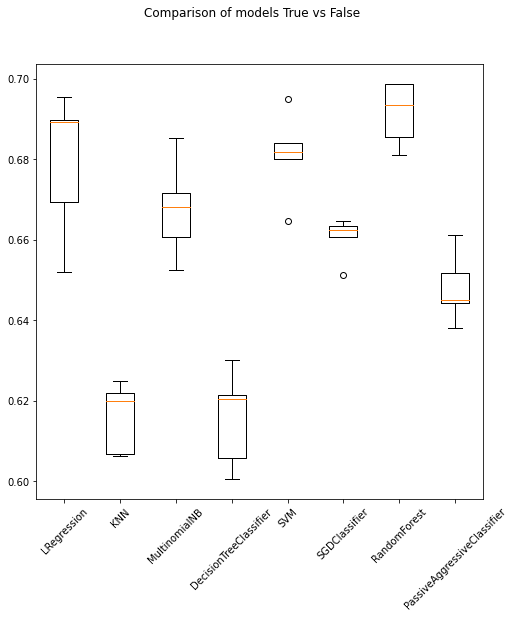

In [ ]:
fig = plt.figure(figsize=(8,8))
if len(classes)>2:
  fig.suptitle('Comparison of models {} vs {} vs {}'.format(classes[0],classes[1],classes[2]))
else:
  fig.suptitle('Comparison of models {} vs {}'.format(classes[0],classes[1]))  
ax = fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(names,rotation = 45)
plt.show()

## Grid Search CV affinement des meilleurs paramètres



### Logistic Regression

In [ ]:
X = df_train["text"]
y = df_train["label"] 

X_s = X.sample(1000)
y_s = y.loc[X_s.index]
preprocess_selection("logistic_regression",LogisticRegression(),X_s,y_s)

Evaluation des différentes configurations : 
Pipeline             Score
-----------------  -------
TFIDF_lowcase       0.6070
TFIDF_lowStop       0.6070
TFIDF_brut          0.6070
CV_brut             0.6020
CV_lowcase          0.6020
CV_lowStop          0.6020
TFIDF_lowStopna     0.5940
TFIDF_lowStopstem   0.5890
CV_lowStopstem      0.5820
CV_lowStopna        0.5800


In [ ]:
X = df_train["text"]
y = df_train["label"]

# put text normalizer in the pipe is a bad idea because of the very long time processing
text_normalizer = TextNormalizer(removestopwords=False,lowercase=True,getstemmer=False,removedigit=False)
X = text_normalizer.fit_transform(X)

X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8,random_state=0)

pipe = Pipeline([('vect', TfidfVectorizer()),
               ('clf', LogisticRegression(solver='lbfgs')),
               ])

grid = {"clf__penalty": ['l2' ,'none'],
        "clf__C":np.logspace(-2,2,4),
        "clf__max_iter":[100,1000]}

gd_srLR = GridSearchCV(pipe,  
                     param_grid=grid,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                    return_train_score=True)

gd_srLR.fit(X_train, y_train)
print('meilleur score ',
 gd_srLR.best_score_,'\n')
print('meilleurs paramètres',
 gd_srLR.best_params_,'\n')
print('meilleur estimateur',
gd_srLR.best_estimator_,'\n')

meilleur score  0.6709828393135725 

meilleurs paramètres {'clf__C': 4.6415888336127775, 'clf__max_iter': 100, 'clf__penalty': 'l2'} 

meilleur estimateur Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=4.6415888336127775))]) 




 accuracy:  0.6837180286961946 


               precision    recall  f1-score   support

        True       0.68      0.67      0.68       789
       False       0.69      0.69      0.69       814

    accuracy                           0.68      1603
   macro avg       0.68      0.68      0.68      1603
weighted avg       0.68      0.68      0.68      1603

Confusion matrix, without normalization


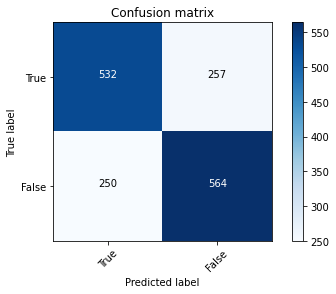

In [ ]:
# Creation d'une instance de l'algorithme en utilisant les meilleurs paramètres
lr = gd_srLR.best_estimator_

lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print('\n accuracy: ', accuracy_score(y_pred, y_val),'\n')

print('\n',classification_report(y_val, y_pred,target_names=classes))
plot_confusion_matrix(confusion_matrix(y_val, y_pred),classes = classes)

Overfitting, Underfitting ?

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


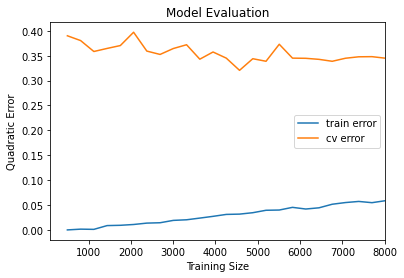

In [ ]:
X = df_train["text"]
y = df_train["label"]
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False)
X = text_normalizer.fit_transform(X)
X = pd.Series(X)
plot_quad_error(X,y,lr)

Evaluation sur le test set


 accuracy:  0.6632996632996633 


               precision    recall  f1-score   support

        True       0.66      0.64      0.65       437
       False       0.66      0.69      0.68       454

    accuracy                           0.66       891
   macro avg       0.66      0.66      0.66       891
weighted avg       0.66      0.66      0.66       891

Confusion matrix, without normalization


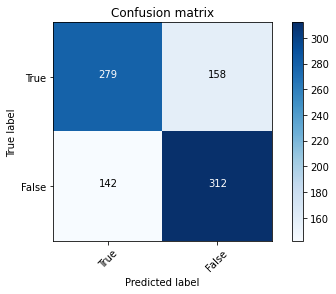

In [ ]:
X_test,y_test = df_test["text"],df_test["label"]
y_pred = lr.predict(X_test)
print('\n accuracy: ', accuracy_score(y_pred, y_test),'\n')

print('\n',classification_report(y_test, y_pred,target_names=classes))
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes = classes)

### SVC

In [ ]:
X = df_train["text"]
y = df_train["label"] 

X_s = X.sample(1000)
y_s = y.loc[X_s.index]
preprocess_selection("SVC",SVC(),X_s,y_s)

Evaluation des différentes configurations : 
Pipeline             Score
-----------------  -------
TFIDF_lowcase       0.6520
TFIDF_lowStop       0.6520
TFIDF_brut          0.6520
CV_lowStopna        0.6350
CV_lowStopstem      0.6310
TFIDF_lowStopna     0.6270
TFIDF_lowStopstem   0.6270
CV_brut             0.6170
CV_lowcase          0.6170
CV_lowStop          0.6170


In [ ]:
X = df_train["text"]
y = df_train["label"]
# put text normalizer in the pipe is a bad idea because of the very long time processing
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=True)
X = text_normalizer.fit_transform(X)
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8,random_state=0)

pipe = Pipeline([('vect', CountVectorizer(lowercase=True)),
               ('clf', SVC()),
              ])

grid = {'clf__C': [100, 1000], 
        'clf__kernel': ['linear'],
        'clf__gamma': [0.001, 0.0001], 
        'clf__kernel': ['rbf']}

gd_srSVC = GridSearchCV(pipe,  
                     param_grid=grid,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                    return_train_score=True)

gd_srSVC.fit(X_train, y_train)
print('meilleur score ',
 gd_srSVC.best_score_,'\n')
print('meilleurs paramètres',
 gd_srSVC.best_params_,'\n')
print('meilleur estimateur',
gd_srSVC.best_estimator_,'\n')


meilleur score  0.6658346333853353 

meilleurs paramètres {'clf__C': 100, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'} 

meilleur estimateur Pipeline(steps=[('vect', CountVectorizer()), ('clf', SVC(C=100, gamma=0.0001))]) 




 accuracy:  0.66126013724267 


               precision    recall  f1-score   support

        True       0.66      0.65      0.65       789
       False       0.66      0.67      0.67       814

    accuracy                           0.66      1603
   macro avg       0.66      0.66      0.66      1603
weighted avg       0.66      0.66      0.66      1603

Confusion matrix, without normalization


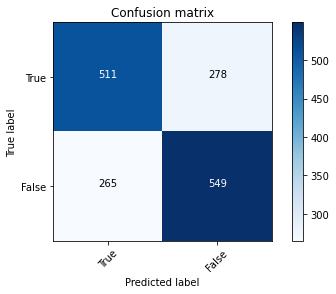

In [ ]:
# Creation d'une instance de l'algorithme en utilisant les meilleurs paramètres
lr = gd_srSVC.best_estimator_

lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print('\n accuracy: ', accuracy_score(y_pred, y_val),'\n')

print('\n',classification_report(y_val, y_pred,target_names=classes))
plot_confusion_matrix(confusion_matrix(y_val, y_pred),classes = classes)

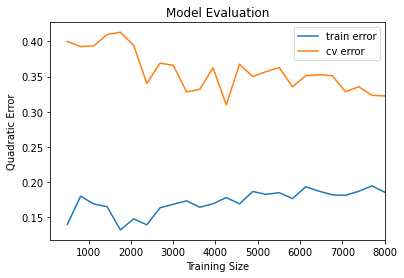

In [ ]:
X = df_train["text"]
y = df_train["label"]
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False)
X = text_normalizer.fit_transform(X)
X = pd.Series(X)
plot_quad_error(X,y,lr)


 accuracy:  0.6172839506172839 


               precision    recall  f1-score   support

        True       0.57      0.84      0.68       437
       False       0.73      0.40      0.52       454

    accuracy                           0.62       891
   macro avg       0.65      0.62      0.60       891
weighted avg       0.65      0.62      0.60       891

Confusion matrix, without normalization


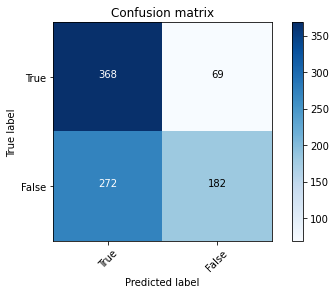

In [ ]:
X_test,y_test = df_test["text"],df_test["label"]
y_pred = lr.predict(X_test)
print('\n accuracy: ', accuracy_score(y_pred, y_test),'\n')

print('\n',classification_report(y_test, y_pred,target_names=classes))
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes = classes)

### MultinomialNB

In [ ]:
X = df_train["text"]
y = df_train["label"] 

X_s = X.sample(1000)
y_s = y.loc[X_s.index]
preprocess_selection("MuntinomialNB",MultinomialNB(),X_s,y_s)

Evaluation des différentes configurations : 
Pipeline             Score
-----------------  -------
TFIDF_lowcase       0.6490
TFIDF_lowStop       0.6490
TFIDF_brut          0.6490
TFIDF_lowStopstem   0.6460
CV_brut             0.6400
CV_lowcase          0.6400
CV_lowStop          0.6400
TFIDF_lowStopna     0.6390
CV_lowStopna        0.6290
CV_lowStopstem      0.6280


In [ ]:
X = df_train["text"]
y = df_train["label"]
# put text normalizer in the pipe is a bad idea because of the very long time processing
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False)
X = text_normalizer.fit_transform(X)
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8,random_state=0)

pipe = Pipeline([('vect', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])

grid = {'clf__alpha': np.linspace(0.5, 1.5, 6),
        'clf__fit_prior': [True, False],}

gd_srMNB = GridSearchCV(pipe,  
                     param_grid=grid,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                    return_train_score=True)

gd_srMNB.fit(X_train, y_train)
print('meilleur score ',
 gd_srMNB.best_score_,'\n')
print('meilleurs paramètres',
 gd_srMNB.best_params_,'\n')
print('meilleur estimateur',
gd_srMNB.best_estimator_,'\n')

meilleur score  0.6570982839313573 

meilleurs paramètres {'clf__alpha': 1.1, 'clf__fit_prior': False} 

meilleur estimateur Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', MultinomialNB(alpha=1.1, fit_prior=False))]) 




 accuracy:  0.6519026824703681 


               precision    recall  f1-score   support

        True       0.63      0.69      0.66       789
       False       0.67      0.62      0.64       814

    accuracy                           0.65      1603
   macro avg       0.65      0.65      0.65      1603
weighted avg       0.65      0.65      0.65      1603

Confusion matrix, without normalization


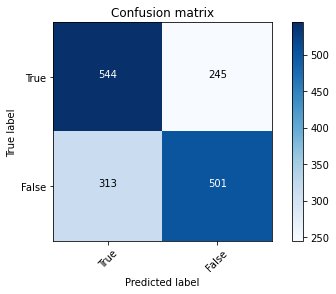

In [ ]:
#Creation d'une instance de l'algorithme en utilisant les meilleurs paramètres
lr = gd_srMNB.best_estimator_

lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print('\n accuracy: ', accuracy_score(y_pred, y_val),'\n')

print('\n',classification_report(y_val, y_pred,target_names=classes))
plot_confusion_matrix(confusion_matrix(y_val, y_pred))

Overfitting underfitting ?

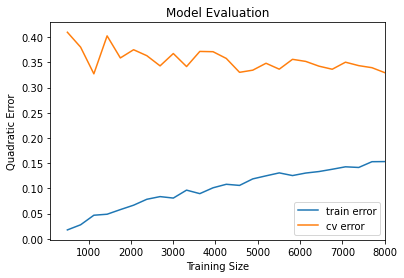

In [ ]:
X = df_train["text"]
y = df_train["label"]
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False)
X = text_normalizer.fit_transform(X)
X = pd.Series(X)
plot_quad_error(X,y,lr)

Evaluation sur le test Set


 accuracy:  0.6453423120089786 


               precision    recall  f1-score   support

        True       0.63      0.65      0.64       437
       False       0.66      0.64      0.65       454

    accuracy                           0.65       891
   macro avg       0.65      0.65      0.65       891
weighted avg       0.65      0.65      0.65       891

Confusion matrix, without normalization


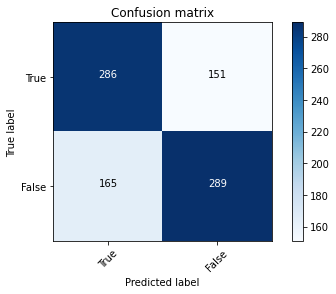

In [ ]:
X_test,y_test = df_test["text"],df_test["label"]
y_pred = lr.predict(X_test)
print('\n accuracy: ', accuracy_score(y_pred, y_test),'\n')

print('\n',classification_report(y_test, y_pred,target_names=classes))
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes = classes)

### RandomForest

In [ ]:
# X = df_train["text"]
# y = df_train["truthRating"]
# text_normalizer= TextNormalizer(removestopwords=False,lowercase=True,getstemmer=False,removedigit=False) 
# X=text_normalizer.fit_transform(X)

In [ ]:
# X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.7,random_state=0)

# pipe = Pipeline([('vect', TfidfVectorizer()),
#                ('clf', RandomForestClassifier()),
#               ])
# grid = { 
#     'clf__n_estimators': [100,200],
#     'clf__max_features': ['auto', 'sqrt', 'log2'],
#     'clf__max_depth' : [7,8],
#     'clf__criterion' :['gini', 'entropy']
# }
# gd_srLR = GridSearchCV(pipe,  
#                      param_grid=grid,
#                      scoring='accuracy',
#                      cv=5,
#                      n_jobs=-1,
#                     return_train_score=True)

# gd_srLR.fit(X_train, y_train)
# print ('meilleur score ',
#  gd_srLR.best_score_,'\n')
# print ('meilleurs paramètres',
#  gd_srLR.best_params_,'\n')
# print ('meilleur estimateur',
# gd_srLR.best_estimator_,'\n')

In [ ]:
# # Creation d'une instance de l'algorithme en utilisant les meilleurs paramètres
# lr = gd_srLR.best_estimator_

# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_val)
# print('\n accuracy: ', accuracy_score(y_pred, y_val),'\n')

# print('\n',classification_report(y_val, y_pred,target_names=classes))
# plot_confusion_matrix(confusion_matrix(y_val, y_pred),classes = classes)

# Deep learning 

### LSTM

In [ ]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SpatialDropout1D
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [ ]:
X = df_train["text"]
y = df_train["ratingName"]

text_normalizer= TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False) 
X=text_normalizer.fit_transform(X)

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = tokenizer.texts_to_sequences(X)
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
y = pd.get_dummies(y).values
print('Shape of label tensor:', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


Found 11914 unique tokens.
Shape of data tensor: (8013, 250)
Shape of label tensor: (8013, 2)
(7211, 250) (7211, 2)
(802, 250) (802, 2)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 5,080,602
Trainable params: 5,080,602
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
102/102 [==============================] - 89s 841ms/step - loss: 0.6511 - accuracy: 0.6118 - v

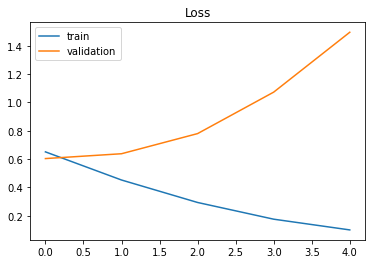

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

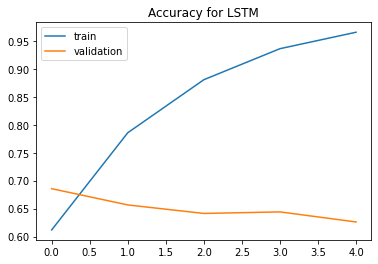

In [ ]:
plt.title('Accuracy for LSTM')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

### Fine tuning BERT

In [ ]:
import torch
from tqdm.notebook import tqdm
!pip install transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_train.index.values, df_train.label.values, test_size=0.15, random_state=0, stratify=df_train.label.values)

df_train.loc[X_train, 'data_type'] = 'train'
df_train.loc[X_val, 'data_type'] = 'val'

df_train.groupby(['ratingName', 'label', 'data_type']).count()

text
ratingName label data_type      
False      1     train      3394
                 val         599
True       0     train      3417
                 val         603

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df_train[df_train.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df_train[df_train.data_type=='val'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt' 
)

encoded_data_test = tokenizer.batch_encode_plus(
    df_test.text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt' 
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df_train[df_train.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df_train[df_train.data_type=='val'].label.values)

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(df_test.label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# We will use Random sampler for train set and sequential sampler for validation
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

dataloader_test = DataLoader(dataset_test, 
                                   sampler=SequentialSampler(dataset_test), 
                                   batch_size=batch_size)

In [ ]:
from transformers import get_linear_schedule_with_warmup

optimizer = torch.optim.AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

model.load_state_dict(torch.load('finetuned_BERT_epoch_1.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_test)
accuracy_per_class(predictions, true_vals)